# Create graphics for paper Figure 5

In [1]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_f1_hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

In [3]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']

# level 2

In [5]:
gating_dir_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl2_hull' 
overview_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl2 = overview_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl2['level'] = 'lvl2'
    

# level 3

In [6]:
gating_dir_lvl3 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl3_hull' 
overview_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl3 = overview_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl3['level'] = 'lvl3'

# level 4

In [7]:
gating_dir_lvl4 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl4_hull' 
overview_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl4 = overview_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl4['level'] = 'lvl4'

# level 5
to do

## Visualize

In [8]:
overview = overview_lvl2.append(overview_lvl3.append(overview_lvl4))

In [9]:
melted = pd.melt(overview[['f1','recall','precision','level']],id_vars=['level'])
melted.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

In [11]:
colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

Text(0.5, 1.0, 'Plot Title')

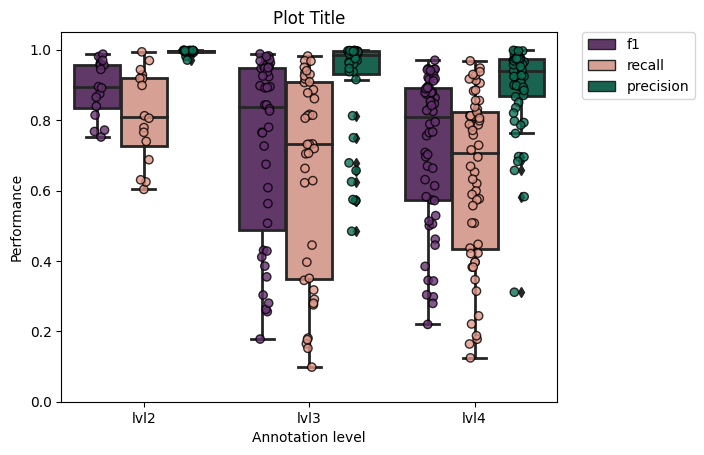

In [16]:
ax =sns.boxplot(x="level",y="score",hue="metric",data = melted,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="level",y="score", dodge=True,hue="metric",data = melted,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Annotation level')
plt.ylabel('Performance')

# Add a title
plt.title('Plot Title')

# Hierachies

In [106]:
overview['hierarchy']

0    2
0    3
0    2
0    3
0    1
    ..
0    3
0    5
0    4
0    4
0    3
Name: hierarchy, Length: 112, dtype: object

In [17]:
melted_hierarchy = pd.melt(overview,id_vars=['level'],value_vars = ['hierarchy'])


In [18]:
melted_hierarchy

,level,variable,value
0,lvl2,hierarchy,2
1,lvl2,hierarchy,3
2,lvl2,hierarchy,2
3,lvl2,hierarchy,3
4,lvl2,hierarchy,1
...,...,...,...
107,lvl4,hierarchy,3
108,lvl4,hierarchy,5
109,lvl4,hierarchy,4
110,lvl4,hierarchy,4


In [33]:
colors_hierarchy={"lvl2": "#FFFFFF","lvl3": "#FFFFFF","lvl4":"#FFFFFF"}

<AxesSubplot: xlabel='level', ylabel='value'>

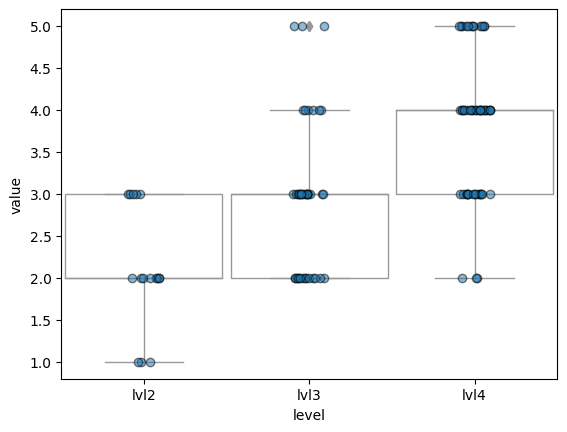

In [37]:
sns.boxplot(x="level",y="value",data = melted_hierarchy,linewidth = 1,width = 0.95,palette = colors_hierarchy)
sns.stripplot(x="level",y="value", dodge=True,data = melted_hierarchy,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.5)

In [45]:
overview[['level','hierarchy']].value_counts().index[

('lvl4', 4)

In [46]:
df_hierachies = pd.DataFrame(overview[['level','hierarchy']].value_counts())

In [50]:
df_hierachies.rename(columns={0: 'Frequency'}, inplace=True)

In [51]:
df_hierachies

Frequency
level hierarchy           
lvl4  4                 25
lvl3  3                 17
lvl4  3                 16
lvl3  2                 14
lvl4  5                 12
lvl2  2                  8
lvl3  4                  6
lvl2  3                  5
      1                  3
lvl3  5                  3
lvl4  2                  3

In [81]:
pivot_df = df_hierachies.pivot_table(index='level', columns='hierarchy', values='Frequency', aggfunc='sum').fillna(0)

In [100]:
norm_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)*100

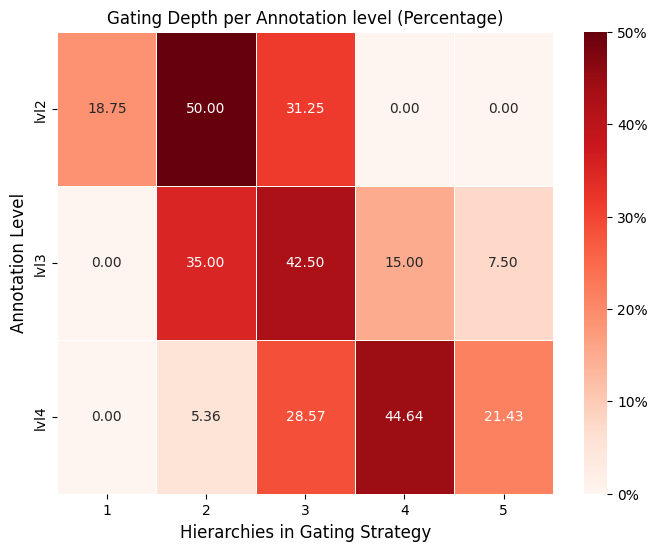

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(norm_df, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5,cbar_kws={'format': '%.0f%%'})
plt.xlabel('Hierarchies in Gating Strategy',fontsize = 12)
plt.ylabel('Annotation Level',fontsize = 12)
plt.title('Gating Depth per Annotation level (Percentage)', fontsize = 12)
plt.show()

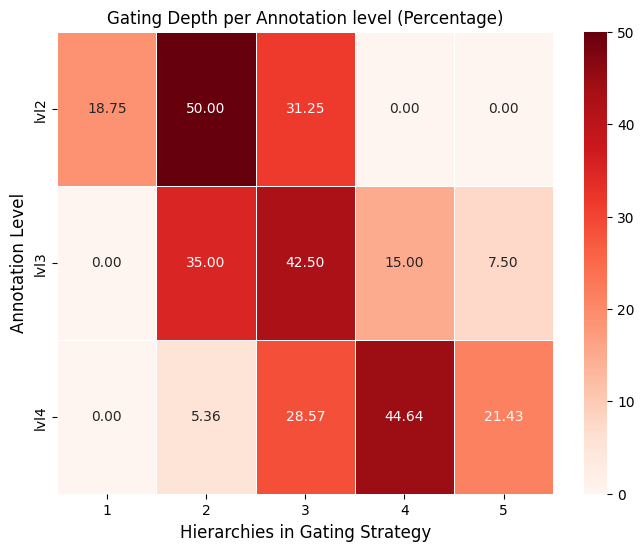

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(norm_df, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.xlabel('Hierarchies in Gating Strategy',fontsize = 12)
plt.ylabel('Annotation Level',fontsize = 12)
plt.title('Gating Depth per Annotation level (Percentage)', fontsize = 12)
plt.show()

In [89]:
pivot_df.sum(axis =1).values

array([16., 40., 56.])

In [58]:
colors_hierarchy={1:"#FFFFFF",2:"#FFFFFF",3:"#FFFFFF",4:"#FFFFFF",5:"#FFFFFF"}

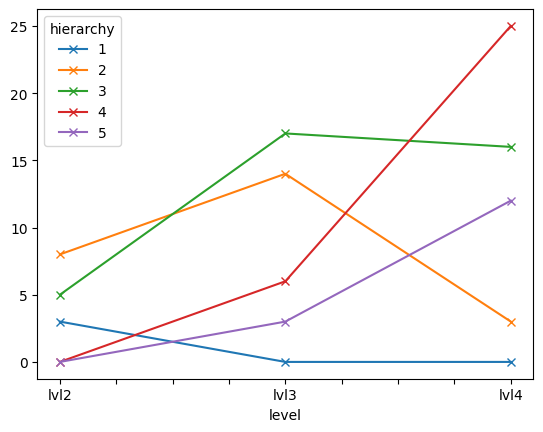

In [76]:
ax = pivot_df.plot(marker = 'x')

In [ ]:
for p in ax.patches:
    height = p.get_height()
    ax.annotate('x', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=12)


In [80]:
sc.pl.dotplot(data, markers)

NameError: name 'markers' is not defined

<AxesSubplot: ylabel='Count'>

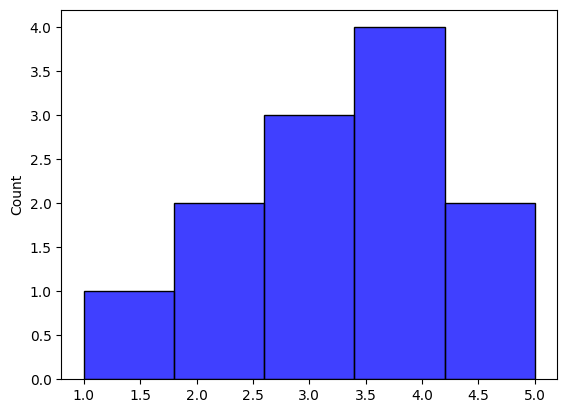

In [79]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5]

# Create the frequency plot
sns.histplot(data, bins=5, kde=False, color='blue', edgecolor='black')

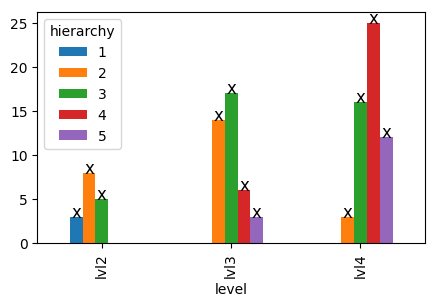

In [78]:
ax = pivot_df.plot(kind='bar', figsize=(5, 3))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('x', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=12)

